**Python Exercise 2: Travel Pony Ad Cost Regression Analysis**  
Objective : Use multiple regression to analyze data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [0]:
#import file
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv(open('drive/My Drive/APRD Digital ads/Homework/Travel Pony Facebook.csv','rb'))

In [0]:
df

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333
3702,2013-06-09,2013-06-09,Bob Jackson,Ad 1,111,1.000000,111,1,1,0.99,0,1,1,1,0,0,0,0,0.00,0.990000
3703,2013-06-08,2013-06-08,Bob Jackson,Ad 1,143,1.000000,143,3,3,0.95,0,3,3,3,0,0,0,0,0.00,0.316667


Question 1 Create scatter plots for spend and: reach, frequency, impressions and clicks. Do you see a linear relationships? As a result, do you think linear regression will work for this problem?

In [0]:
#remove rows that have amount spent 
df1 = df[df['Amount Spent (USD)'] > 0]

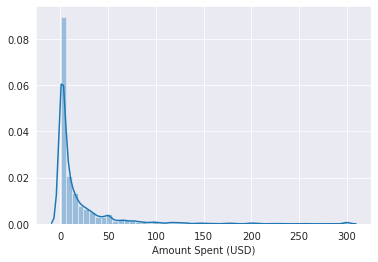

In [0]:
#graph a histogram of Amount Spent using Seaborn
sns.set_style('darkgrid')
sns.distplot(df1['Amount Spent (USD)'])

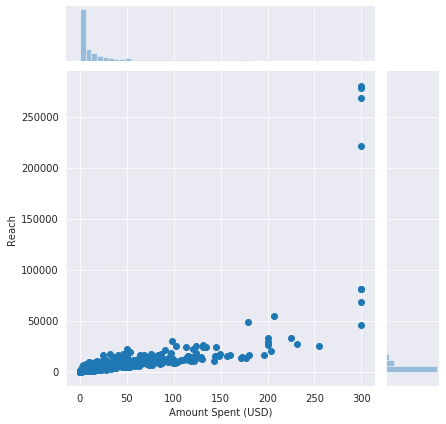

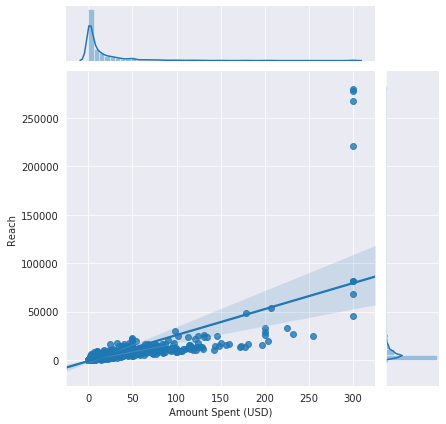

In [0]:
sns.jointplot('Amount Spent (USD)','Reach',data=df1,kind='scatter')
sns.jointplot('Amount Spent (USD)','Reach',data=df1,kind='reg')

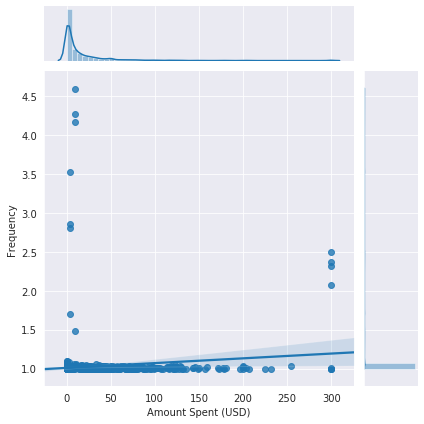

In [0]:
sns.jointplot('Amount Spent (USD)','Frequency',data=df1,kind='reg')

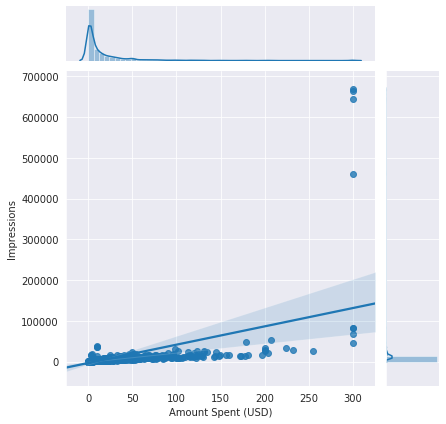

In [0]:
sns.jointplot('Amount Spent (USD)','Impressions',data=df1,kind='reg')

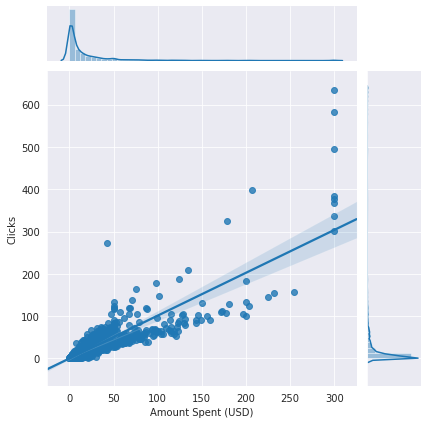

In [0]:
sns.jointplot('Amount Spent (USD)','Clicks',data=df1,kind='reg')

Question 2 build a multiple regression

In [0]:
#import library
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import time
%matplotlib inline

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
name = df1['Campaign Name']

In [0]:
#remove text that we dont use
a=df1['Campaign Name'].str.replace("-","")
a=a.str.replace('\d+',"")
df1.loc['Campaign Name']=a.str.replace('[^a-zA-Z0-9:\s+]',"")

In [0]:
#Build a multiple regression by creating dummy variables
campaign = pd.get_dummies(df1['Campaign Name'])
df2 = pd.concat([df1, campaign], axis=1)
df2['Campaign Name'].unique()

array(['Cyber Weekend', 'TravelPony: General Ads',
       'TravelPony: Conversion Test',
       'Post: You need to get some real sun and we are here to',
       'Nanigans', 'SimpleMultiFillCampaign', 'http:travelponyClicksUS',
       'TravelponyPage LikesUS', 'Ad ', nan], dtype=object)

In [0]:
X = df2[['Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks','Cyber Weekend', 'TravelPony: General Ads',
       'TravelPony: Conversion Test',
       'Post: You need to get some real sun and we are here to',
       'Nanigans', 'SimpleMultiFillCampaign', 'http:travelponyClicksUS',
       'TravelponyPage LikesUS', 'Ad ']]
Y = df2['Amount Spent (USD)']

In [0]:
model = sm.OLS(df2['Amount Spent (USD)'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1282.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:42:01   Log-Likelihood:                -6484.6
No. Observations:                1802   AIC:                         1.301e+04
Df Residuals:                    1781   BIC:                         1.313e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Reach                                                      0.0031      0.000     20.623      0.000       0.003       0.003
Frequency                                                  8.0177      3.337      2.403      0.016       1.474      14.562
Impressions                                               -0.0008   8.08e-05     -9.964      0.000      -0.001      -0.001
Clicks                                                    -0.3369      0.110     -3.073      0.002      -0.552      -0.122
Unique Clicks                                              0.5557      0.122      4.569      0.000       0.317       0.794
Page Likes                                                23.2839      8.919      2.611      0.009       5.791      40.777
Page Engagement                                          -20.1012      8.916     -2.255      0.024     -37.588      -2.615
Post Engagement                                           17.1443      7.431      2.307      0.021       2.571      31.718
Post Likes                                                 2.3301      1.491      1.563      0.118      -0.594       5.254
Post Comments                                              3.5094      1.551      2.263      0.024       0.468       6.551
Post Shares                                                4.8389      1.513      3.198      0.001       1.871       7.807
Photo Views                                                3.1375      1.489      2.107      0.035       0.217       6.058
Website Clicks                                             3.3284      1.489      2.235      0.026       0.408       6.249
Cyber Weekend                                           -210.0978     26.172     -8.028      0.000    -261.429    -158.766
TravelPony: General Ads                                  -34.0630      6.690     -5.091      0.000     -47.185     -20.941
TravelPony: Conversion Test                               45.4009      5.816      7.806      0.000      33.993      56.808
Post: You need to get some real sun and we are here to   -25.4838      7.772     -3.279      0.001     -40.726     -10.241
Nanigans                                                 -11.1471      3.438     -3.242      0.001     -17.891      -4.403
SimpleMultiFillCampaign                                   -8.8824      3.374     -2.632      0.009     -15.500      -2.265
http:travelponyClicksUS                                  -26.2998     11.525     -2.282      0.023     -48.904      -3.695
TravelponyPage LikesUS                                   -15.2335      5.554     -2.743      0.006     -26.127      -4.340
Ad                                                        -8.7199      4.648     -1.876      0.061     -17.836       0.396
========

Question 3 What are the three predictors with the highest predictive value 

In [0]:
#Page Likes, Post Engagement, and Frequency are top three predictors for Amount Spent
df4 = []
df4 = pd.concat([model.params, model.pvalues, ],axis=1)
df4.columns = ['Coef', 'Pvalue']
df4.sort_values('Coef', inplace = True, ascending=False) #rank them from high to low
df4.head(3)

,Coef,Pvalue
TravelPony: Conversion Test,45.400855,1.000268e-14
Page Likes,23.283870,9.115606e-03
Post Engagement,17.144252,2.115573e-02
